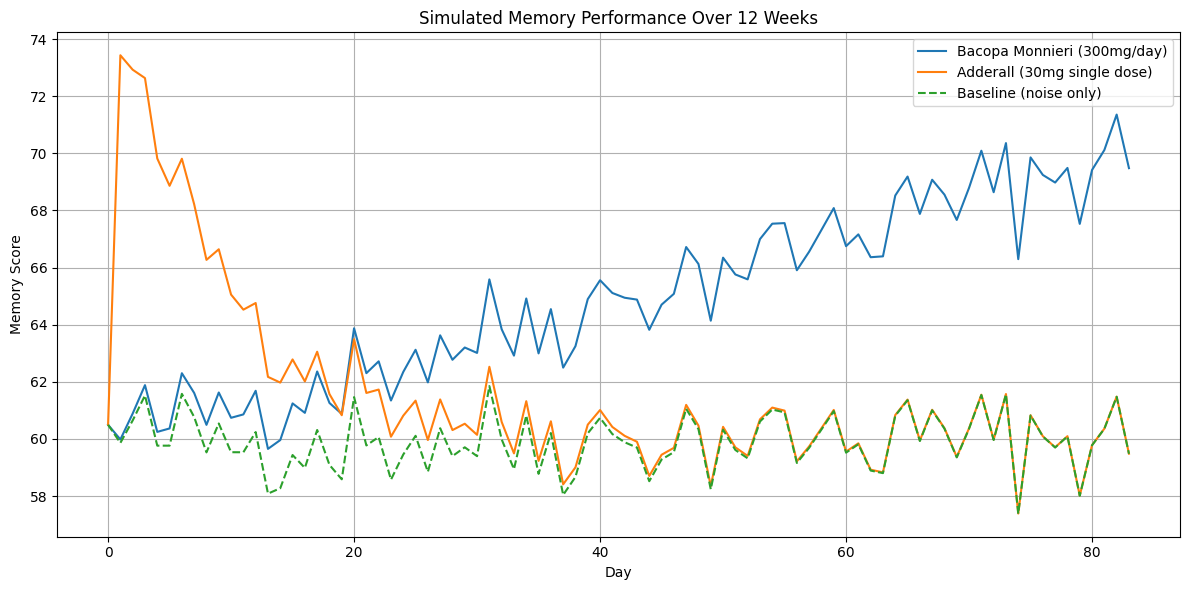

In [1]:
# 📊 Simulation: Bacopa Monnieri vs Adderall Cognitive Effects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Set Parameters ---
np.random.seed(42)
n_days = 84  # 12 weeks
baseline_score = 60  # average baseline memory score (0-100 scale)
adderall_peak = 15   # peak boost from Adderall
adderall_decay = 0.1 # exponential decay rate
bacopa_max_boost = 10  # max gain from Bacopa over 12 weeks
noise_std = 1  # simulation noise

# --- Simulate Daily Changes ---
days = np.arange(n_days)
bacopa_effect = np.linspace(0, bacopa_max_boost, n_days)  # gradual increase
adderall_effect = [adderall_peak * np.exp(-adderall_decay * day) if day > 0 else 0 for day in days]
noise = np.random.normal(0, noise_std, n_days)

# --- Simulated Scores ---
bacopa_scores = baseline_score + bacopa_effect + noise
adderall_scores = baseline_score + np.array(adderall_effect) + noise
baseline_scores = baseline_score + noise  # natural variation only

# --- Package into DataFrame ---
df = pd.DataFrame({
    "Day": days,
    "Bacopa_Monnieri": bacopa_scores,
    "Adderall": adderall_scores,
    "Baseline": baseline_scores
})

# --- Plot Results ---
plt.figure(figsize=(12, 6))
plt.plot(df["Day"], df["Bacopa_Monnieri"], label="Bacopa Monnieri (300mg/day)")
plt.plot(df["Day"], df["Adderall"], label="Adderall (30mg single dose)")
plt.plot(df["Day"], df["Baseline"], linestyle="--", label="Baseline (noise only)")
plt.title("Simulated Memory Performance Over 12 Weeks")
plt.xlabel("Day")
plt.ylabel("Memory Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


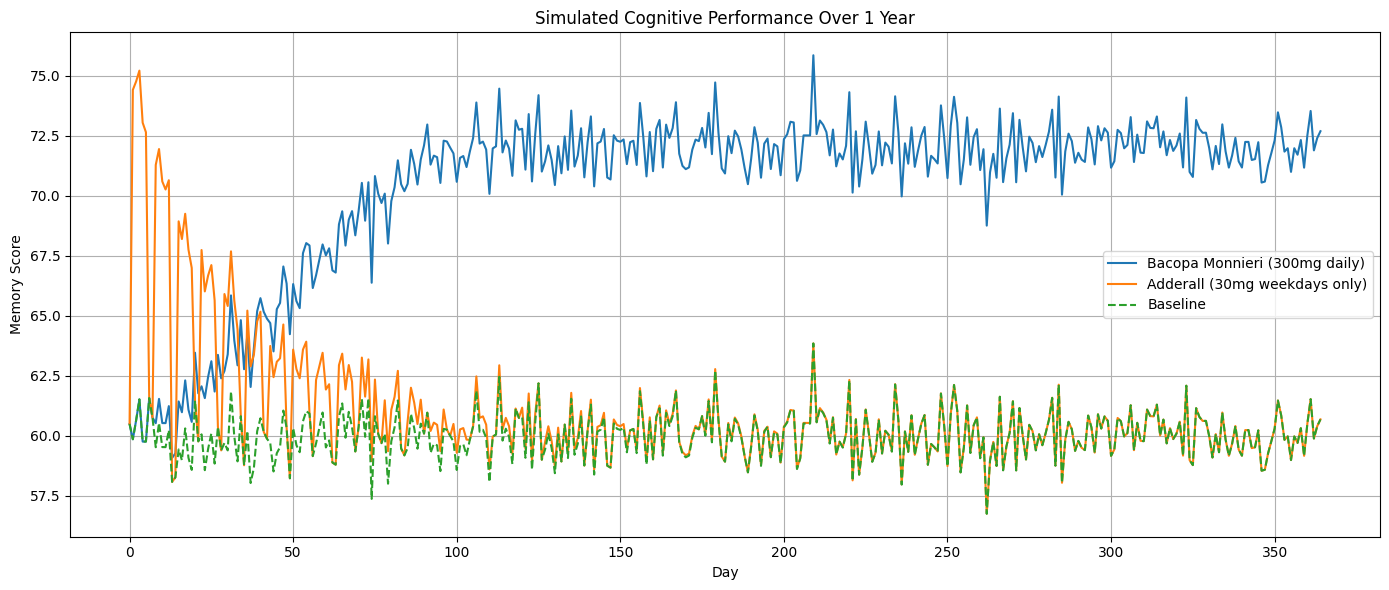

In [2]:
# 🧠 Bacopa vs Adderall – 1 Year Simulation (365 days)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Parameters ---
np.random.seed(42)
n_days = 365
baseline_score = 60
bacopa_max_boost = 12
bacopa_build_days = 90  # plateau after 3 months
adderall_initial_boost = 15
adderall_decay_rate = 0.03  # tolerance builds ~3% per use
noise_std = 1

# --- Days ---
days = np.arange(n_days)
noise = np.random.normal(0, noise_std, n_days)

# --- Bacopa Simulation ---
bacopa_effect = np.piecewise(
    days,
    [days <= bacopa_build_days, days > bacopa_build_days],
    [lambda d: (bacopa_max_boost / bacopa_build_days) * d, bacopa_max_boost]
)
bacopa_scores = baseline_score + bacopa_effect + noise

# --- Adderall Simulation ---
adderall_scores = []
adderall_boost = adderall_initial_boost
tolerance_multiplier = 1.0

for day in days:
    if day % 7 in [0, 6]:  # weekends = no use
        adderall_scores.append(baseline_score + noise[day])  # no effect, only noise
        tolerance_multiplier *= 0.97  # small recovery on off days
    else:
        boost = adderall_boost * tolerance_multiplier
        adderall_scores.append(baseline_score + boost + noise[day])
        tolerance_multiplier *= (1 - adderall_decay_rate)  # tolerance increases

# --- Baseline (Noise Only) ---
baseline_scores = baseline_score + noise

# --- Package DataFrame ---
df = pd.DataFrame({
    "Day": days,
    "Bacopa_Monnieri": bacopa_scores,
    "Adderall_Weekdays": adderall_scores,
    "Baseline": baseline_scores
})

# --- Plotting ---
plt.figure(figsize=(14, 6))
plt.plot(df["Day"], df["Bacopa_Monnieri"], label="Bacopa Monnieri (300mg daily)")
plt.plot(df["Day"], df["Adderall_Weekdays"], label="Adderall (30mg weekdays only)")
plt.plot(df["Day"], df["Baseline"], linestyle="--", label="Baseline")
plt.title("Simulated Cognitive Performance Over 1 Year")
plt.xlabel("Day")
plt.ylabel("Memory Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


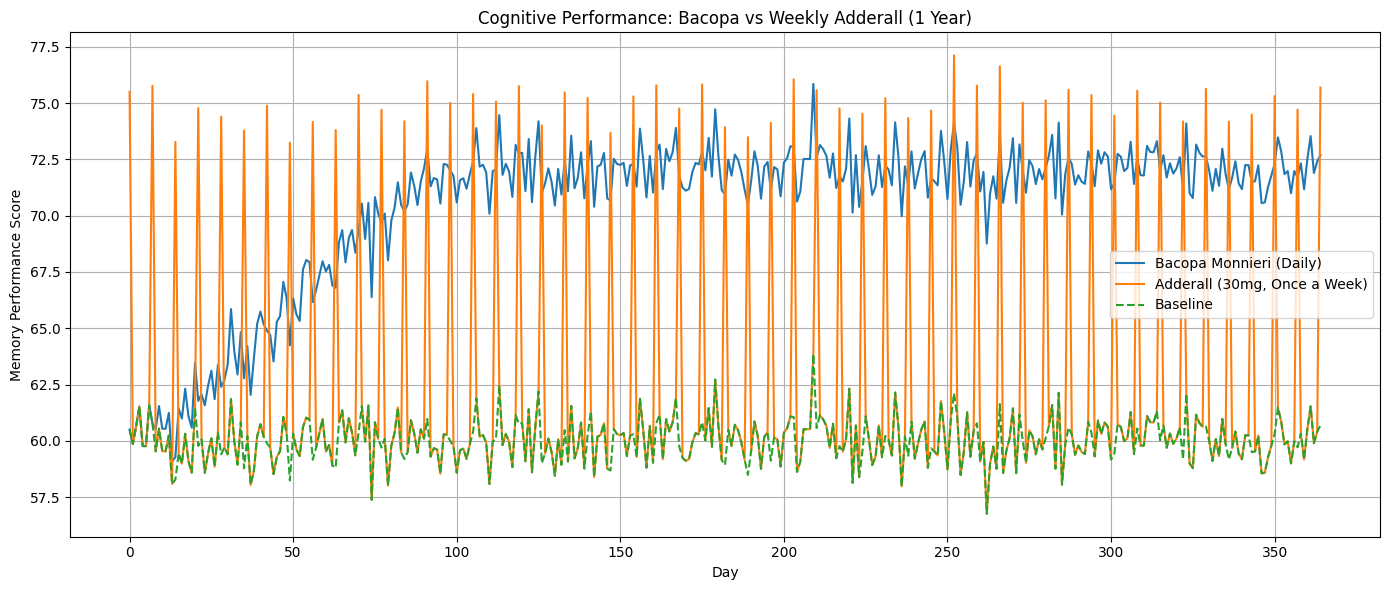

In [5]:
# 🧠 Bacopa vs Adderall (Once a Week) – 1 Year Simulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Parameters ---
np.random.seed(42)
n_days = 365
baseline_score = 60
bacopa_max_boost = 12
bacopa_build_days = 90
adderall_boost_single = 15  # one-day spike
noise_std = 1

# --- Time Axis ---
days = np.arange(n_days)
noise = np.random.normal(0, noise_std, n_days)

# --- Bacopa Monnieri (Daily) ---
bacopa_effect = np.piecewise(
    days,
    [days <= bacopa_build_days, days > bacopa_build_days],
    [lambda d: (bacopa_max_boost / bacopa_build_days) * d, bacopa_max_boost]
)
bacopa_scores = baseline_score + bacopa_effect + noise

# --- Adderall (Once a Week – Every Monday) ---
adderall_scores = []
for day in days:
    if day % 7 == 0:  # Monday only
        adderall_scores.append(baseline_score + adderall_boost_single + noise[day])
    else:
        adderall_scores.append(baseline_score + noise[day])

# --- Baseline (Noise Only) ---
baseline_scores = baseline_score + noise

# --- DataFrame ---
df = pd.DataFrame({
    "Day": days,
    "Bacopa_Monnieri": bacopa_scores,
    "Adderall_Weekly": adderall_scores,
    "Baseline": baseline_scores
})

# --- Plotting ---
plt.figure(figsize=(14, 6))
plt.plot(df["Day"], df["Bacopa_Monnieri"], label="Bacopa Monnieri (Daily)")
plt.plot(df["Day"], df["Adderall_Weekly"], label="Adderall (30mg, Once a Week)")
plt.plot(df["Day"], df["Baseline"], linestyle="--", label="Baseline")
plt.title("Cognitive Performance: Bacopa vs Weekly Adderall (1 Year)")
plt.xlabel("Day")
plt.ylabel("Memory Performance Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


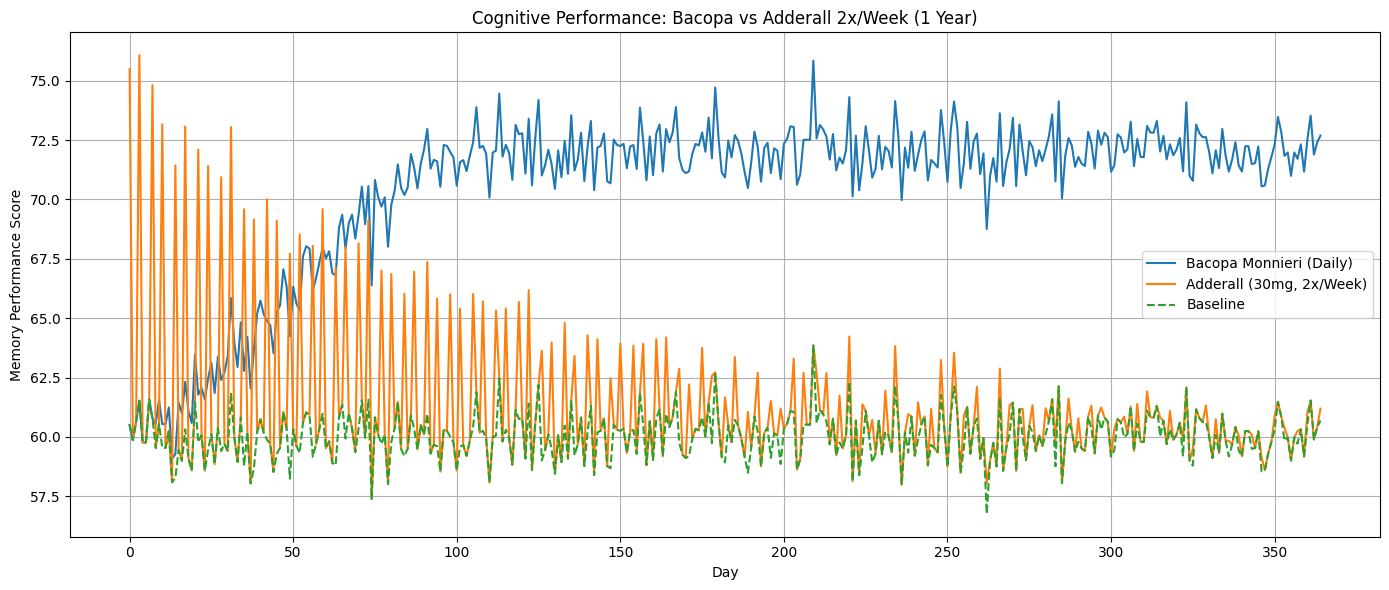

In [6]:
# 🧠 Bacopa vs Adderall (Twice a Week) – 1 Year Simulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Parameters ---
np.random.seed(42)
n_days = 365
baseline_score = 60
bacopa_max_boost = 12
bacopa_build_days = 90
adderall_initial_boost = 15
adderall_decay = 0.02  # tolerance increases slowly
noise_std = 1

# --- Days ---
days = np.arange(n_days)
noise = np.random.normal(0, noise_std, n_days)

# --- Bacopa Simulation (Daily) ---
bacopa_effect = np.piecewise(
    days,
    [days <= bacopa_build_days, days > bacopa_build_days],
    [lambda d: (bacopa_max_boost / bacopa_build_days) * d, bacopa_max_boost]
)
bacopa_scores = baseline_score + bacopa_effect + noise

# --- Adderall Simulation (Twice a Week: Monday and Thursday) ---
adderall_scores = []
tolerance = 1.0  # starts at full strength

for day in days:
    if day % 7 in [0, 3]:  # Monday=0, Thursday=3
        boost = adderall_initial_boost * tolerance
        adderall_scores.append(baseline_score + boost + noise[day])
        tolerance *= (1 - adderall_decay)  # tolerance builds
    else:
        adderall_scores.append(baseline_score + noise[day])
        tolerance *= 0.995  # slight tolerance recovery on off-days

# --- Baseline (Noise Only) ---
baseline_scores = baseline_score + noise

# --- DataFrame ---
df = pd.DataFrame({
    "Day": days,
    "Bacopa_Monnieri": bacopa_scores,
    "Adderall_Twice_Weekly": adderall_scores,
    "Baseline": baseline_scores
})

# --- Plotting ---
plt.figure(figsize=(14, 6))
plt.plot(df["Day"], df["Bacopa_Monnieri"], label="Bacopa Monnieri (Daily)")
plt.plot(df["Day"], df["Adderall_Twice_Weekly"], label="Adderall (30mg, 2x/Week)")
plt.plot(df["Day"], df["Baseline"], linestyle="--", label="Baseline")
plt.title("Cognitive Performance: Bacopa vs Adderall 2x/Week (1 Year)")
plt.xlabel("Day")
plt.ylabel("Memory Performance Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Slide 1

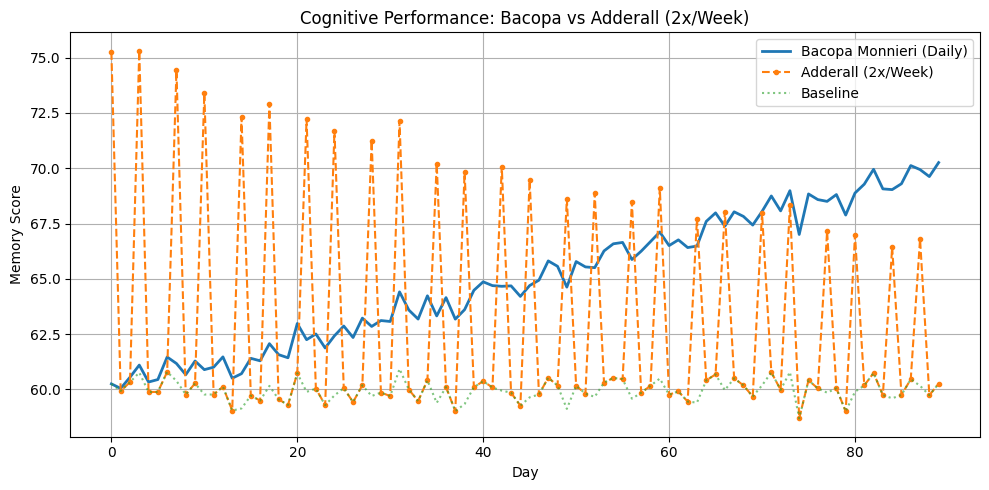

In [8]:
# 🔁 Slide 1: Bacopa vs Adderall (2x/week) – 90 Days
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
np.random.seed(42)
n_days = 90
baseline = 60
bacopa_max_boost = 10
bacopa_build_days = 90
adderall_initial_boost = 15
adderall_decay = 0.02  # tolerance decay
noise_std = 0.5

days = np.arange(n_days)
noise = np.random.normal(0, noise_std, n_days)

# --- Bacopa = smooth buildup ---
bacopa = baseline + np.linspace(0, bacopa_max_boost, n_days) + noise

# --- Adderall = 2x/week (Mon = 0, Thu = 3) with tolerance ---
adderall_scores = []
tolerance = 1.0

for day in days:
    if day % 7 in [0, 3]:  # Monday & Thursday
        score = baseline + (adderall_initial_boost * tolerance) + noise[day]
        adderall_scores.append(score)
        tolerance *= (1 - adderall_decay)  # increase tolerance
    else:
        adderall_scores.append(baseline + noise[day])
        tolerance *= 0.995  # slow recovery

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(days, bacopa, label="Bacopa Monnieri (Daily)", linewidth=2)
plt.plot(days, adderall_scores, label="Adderall (2x/Week)", linestyle='--', marker='o', markersize=3)
plt.plot(days, baseline + noise, label="Baseline", linestyle=":", alpha=0.6)
plt.title("Cognitive Performance: Bacopa vs Adderall (2x/Week)")
plt.xlabel("Day")
plt.ylabel("Memory Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
